# Linear Regression Project Template

This notebook aims to be an example and template that can be used for future data science projects that have follow a similar format.

---

During the introduction you should frame the problem, the data, and provide some general background. Try to talk about the real-world context of the problem you're trying to solve and how you'll measure performance.

In this example I'll be using the Boston house prices dataset.

## Contents

Be sure to provide a contents section and ideally link it to the document so readers can quickly jump to their area of interest.  
- Data Collection
- Data Exploration
- Data Preparation
- Data Modelling
- Model Tuning
- Solution

### Data Collection
Depending on your project this section will vary a large amount. Whether you're doing some complicated web-scraping or simply downloading an online dataset, take some time to explain the data.

In [61]:
# You might need to use some of the below packages
import numpy as np
import pandas as pd
# import requests
# from bs4 import beautifulsoup

In [10]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
data = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=columns)

In [11]:
# A quick high-level check of the data is always helpful to make sure you're getting what you expected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Exploration
This is likely to be the longest and most detailed part of the project. You are looking to explore each attribute of the data and all of the characteristics. Using visualisations and thorough analysis you should seek out correlations and consider how to solve the problem manually. Try to identify promising transformations you may apply and think about any extra data that might be useful.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

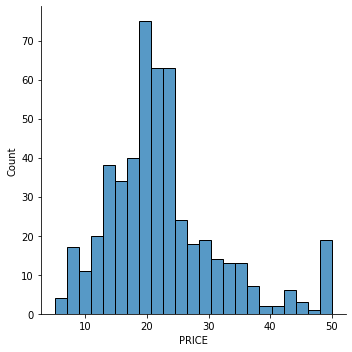

In [17]:
# Plot the distribution of the target variable
sns.displot(data['PRICE'])

For regression problems it is often beneficial to scale or transform both the feature and target variables to be normally distributed. In the data preparation section we'll transform the data before applying any models.

#### Correlations
In this section we'll look at correlations between variables and try to gain an insight into which variables impact others and which will be valuable

<AxesSubplot:>

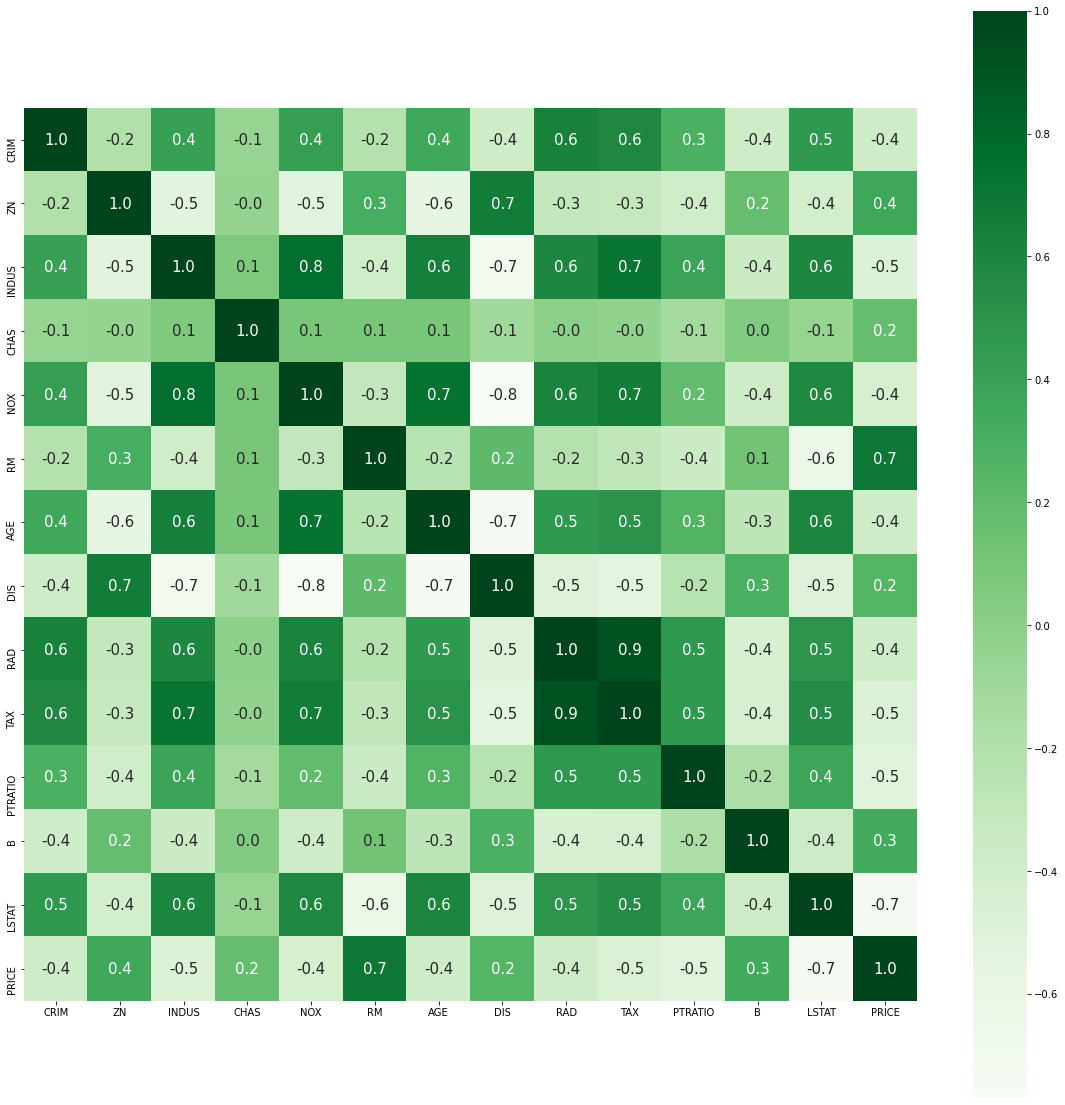

In [19]:
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [27]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)
print(corr_sorted[corr_sorted!=1].head(10).drop_duplicates())
print(corr_sorted[corr_sorted!=1].tail(10).drop_duplicates())

TAX    RAD      0.910228
INDUS  NOX      0.763651
NOX    AGE      0.731470
TAX    INDUS    0.720760
PRICE  RM       0.695360
dtype: float64
LSTAT  RM      -0.613808
DIS    INDUS   -0.708027
PRICE  LSTAT   -0.737663
AGE    DIS     -0.747881
DIS    NOX     -0.769230
dtype: float64


After identifying some of the highest correlations it is worthwhile to spend some time visualising them. The example below shows how industry varies with price, age and nitric oxides concentration.

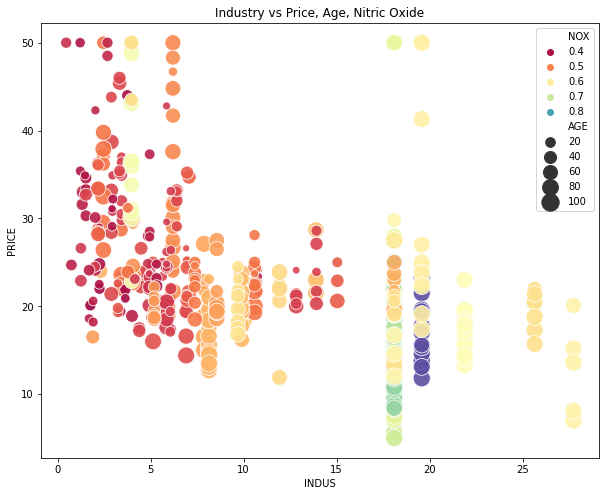

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="PRICE", x="INDUS", hue="NOX", size="AGE", data=data, ax=ax, sizes=(50, 300),
                palette='Spectral', alpha=0.9)
ax.set_title("Industry vs Price, Age, Nitric Oxide")
ax.legend()
plt.show()

### Data Preparation
Prior to fitting a machine learning model, steps must be taken to prepare the data to get the most out of the models.

- Splitting data into train and test sets ensures that we evaluate our model on unseen data.
- Scaling the features to have a mean residing at 0 and a standard deviation of 1 helps to bring a consistency to our variables. This stops the model putting higher weights on greater values, and vice versa.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# Splitting the features and target variable

cols = data.columns.drop('PRICE')
X = data[cols]
y = data['PRICE']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Do I need to scale the target? I said earlier that I would...

### Data Modelling
Now that the data is prepared, we can fit different models on the training data and compare their performance on predicting the test data. To evaluate the models we'll use a variety of scoring metrics suitable to a regression problem like this.

This diagram from the [scikit-learn](https://scikit-learn.org/stable/_static/ml_map.png) website can be helpful tool when it comes to deciding which models to initially compare.

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

#### Linear Regression

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
ridge_alpha = RidgeCV(cv=10)
ridge_alpha.fit(X_train, y_train)
alpha = ridge_alpha.alpha_

ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

Ridge(alpha=10.0, random_state=42)

In [57]:
lasso_alpha = LassoCV(cv=10)
lasso_alpha.fit(X_train, y_train)
alpha = lasso_alpha.alpha_

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.015856481375804393, random_state=42)

In [58]:
EN_alpha = ElasticNetCV(cv=10)
EN_alpha.fit(X_train, y_train)
alpha= EN_alpha.alpha_

EN = ElasticNet(alpha=alpha, random_state=42)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.022372868289978393, random_state=42)

In [62]:
def plot_coef (models):
    
    coefs = {}
    rows = []
    fig, ax = plt.subplots(figsize=(16,8))
    offset = 0
    width = 0.23
    x = np.arange(len(X.columns))
    
    # Creating a neat table to view
    for model in models:
        coefs[type(model).__name__] = model.coef_
        
    coefs_table = pd.DataFrame.from_dict(coefs, orient='index')
    coefs_table.columns = X.columns
    
    # Using the table to create a chart
    for i in range(len(models)):
        increment = width
        ax.bar(x - width + offset, coefs_table.iloc[i], width=width, label=type(models[i]).__name__)
        offset = offset + increment
        
    ax.set_ylabel('Coefficient')
    ax.set_xlabel('Features')
    ax.set_title('Feature Coefficients')
    ax.set_xticks(x)
    ax.set_xticklabels(X.columns)
    ax.legend()
    
    return coefs_table

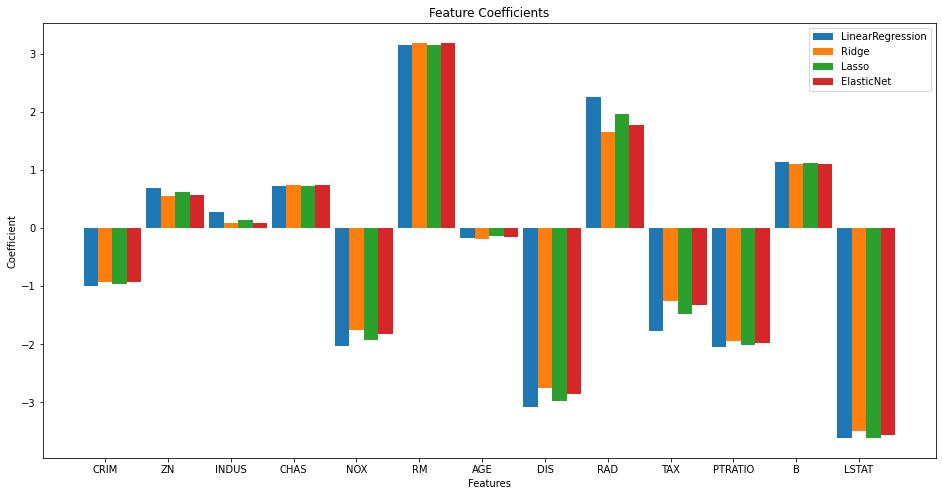

In [63]:
models = [lr, ridge, lasso, EN]

coefs_table = plot_coef(models)

In [64]:
coefs_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
LinearRegression,-1.002135,0.696269,0.278065,0.718738,-2.022319,3.145240,-0.176048,-3.081908,2.251407,-1.767014,-2.037752,1.129568,-3.611658
Ridge,-0.921294,0.551132,0.081748,0.746859,-1.749375,3.187166,-0.183283,-2.755857,1.657512,-1.247576,-1.950940,1.106508,-3.496083
Lasso,-0.958219,0.617603,0.134094,0.720872,-1.922296,3.155068,-0.139875,-2.970538,1.966432,-1.482889,-2.008507,1.110687,-3.607906
ElasticNet,-0.932723,0.571370,0.084219,0.733810,-1.822767,3.174294,-0.155483,-2.850071,1.765874,-1.316816,-1.976324,1.106058,-3.554446


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
def make_pred (models, X_test, y_test):
    
    results = {}
    
    for model in models:
        y_pred = model.predict(X_test)
        results[type(model).__name__] = [mean_squared_error(y_test, y_pred)**(1/2), 
                                         mean_absolute_error(y_test, y_pred), 
                                         r2_score(y_test, y_pred)]
        
        results = pd.DataFrame(results, index=['RMSE','MAE','R2'])
        
    return results

In [67]:
make_pred(models, X_test, y_test).T

,RMSE,MAE,R2
LinearRegression,4.928602,3.189092,0.668759
Ridge,4.949328,3.172281,0.665968
Lasso,4.936281,3.178586,0.667727
ElasticNet,4.944837,3.173350,0.666574


**Root Mean Square Error (RMSE)**  
RMSE is the square root of the error function that the regression algorithms are trying to reduce. It is an absolute measure of how well the model fits the data.

**Mean Absolute Error (MAE)**  
Similarly to RMSE, MAE looks at the sum of the value of errors. However, since we are not squaring the value and instead taking the absolute value, it is more forgiving to large prediction errors.

**R Square**  
R Square measures how much variability in a dependent variable can be explained by the model. It is a good metric to determine the fit on dependent variables. But, it does not take into consideration overfitting.

In [68]:
# Conclusion